<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF OPE - 2019</span></p>
<p><font size="4">  UE Machine Learning and advanced processing methods for multi-sensor data  </font></p>
<p></p>
<p><font size="5">  Notebook 03: Python lab - Clustering </font></p>
</p></br>
</p>
</CENTER>

# <span style="color:#00B8DE"> 1. Kmeans clustering algorithms</span> 

In [1]:
import numpy as np
import skimage
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from skimage.color import rgb2gray
#import image
import cvxopt
from cvxopt import matrix

#### Question 1: Generate a random dataset in two dimensions which is divided into $K$ groups. Each group has N elements and centered to K given centers.

In [2]:
# Generate the random data which has K centers
def generate_data(centers, nb_elements):
    data,label = make_blobs(n_samples=nb_elements, n_features=2, centers=centers, random_state=None)
    return data,label

#### Question 2: Plot the generated data

Text(0.5, 1.0, 'The centers and clusters')

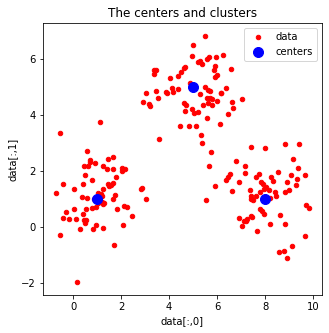

In [3]:
# Initialize the parameters of generate_data
centers = np.array([[1,1], [5,5], [8,1]])
nb_elements = 200
data,label = generate_data(centers, nb_elements)

# Display the results
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(data[:, 0], data[:, 1],s=20,color="red",label='data')
plt.scatter(centers[:,0],centers[:,1],s=100,color="blue",label='centers')
plt.legend(loc='upper right')
plt.xlabel('data[:,0]')
plt.ylabel('data[:,1]')
plt.title('The centers and clusters')

In [4]:
print("label",label)

label [2 0 2 0 1 0 1 0 1 1 0 0 0 1 1 1 1 2 1 0 0 2 2 0 1 0 2 0 2 0 1 2 0 2 1 2 0
 2 2 2 0 0 0 1 1 2 0 1 1 0 2 1 0 2 1 1 1 2 0 1 2 2 2 2 0 0 0 2 1 2 1 1 2 0
 2 2 1 2 1 2 1 1 1 0 1 2 2 1 0 0 2 0 0 2 0 1 0 2 2 2 2 2 2 1 0 2 1 0 2 1 1
 1 2 1 0 0 0 1 2 2 1 2 2 0 2 1 0 0 0 0 0 2 1 0 1 1 1 0 0 2 1 1 1 2 1 2 0 2
 0 1 0 0 0 1 0 2 1 0 2 0 2 0 0 0 1 0 1 1 1 2 1 2 0 0 0 0 1 1 2 2 2 2 2 2 1
 1 1 1 1 0 1 1 0 2 1 2 2 0 0 2]


#### Question 3: Implement Kmeans algorithm

In [5]:
# Kmeans algorithm
def Keans(X,k=3,max_iterations=1000,threshold=0.0001):
    """
    Input:
    X: R^m*n, there are m samples, and for each sample, it has n features
    k: number of groups
    max_iterations: maximum iterations
    threshold: the tolerance of difference of centroids and new centroids
    ---------------------------------------------------------------------
    Output:
    label: label of each data
    initial_centroids: the initial centroids
    centroids: the final centroids for each clusters   
    """
    # 1. Randomly pick K initial cluster centroids
    m, n = np.shape(X)
    centroids = np.zeros((k, n))
    for i in range(k):
        centroids[i] = X[np.random.choice(range(m))]
    initial_centroids = centroids

    # 2.Iteration until convergence or max iterations
    for itera in range(max_iterations):
        # 2.1 For each k:
        # 2.1.1 Form the cluster, store the samples that are closest the centroid
        clusters = [[] for i in range(k)]
        for data_i, data in enumerate(X):
            # Calculate the distance between the samples and the each centroids
            distances = np.zeros((centroids.shape[0],1))
            for each_i,each in enumerate(centroids):
                distances[each_i] = np.sum(np.power((data-each),2))
            
            # Find the closest centroids
            centroid_groups = np.argmin(distances)
            clusters[centroid_groups].append(data_i)
        
        # Store the old centroids
        old_centroids = centroids
        
        # 2.1.2 For each k, recompute the center of cluster
        centroids = np.zeros((k, n))
        for each_i, each in enumerate(clusters):
            centroids[each_i] = np.mean(X[each], axis=0)

        # 2.1.3 If the threshold is small enough, break loop
        if np.abs(centroids - old_centroids).any() < threshold :
            break
            
    # 3. Store the labels respective to each sample
    label = np.zeros(m)
    for cluster_i, cluster in enumerate(clusters):
        for each in cluster:
            label[each] = cluster_i
            
    return label,initial_centroids,centroids


#### Question 4: Plot the segmented result using Kmeans

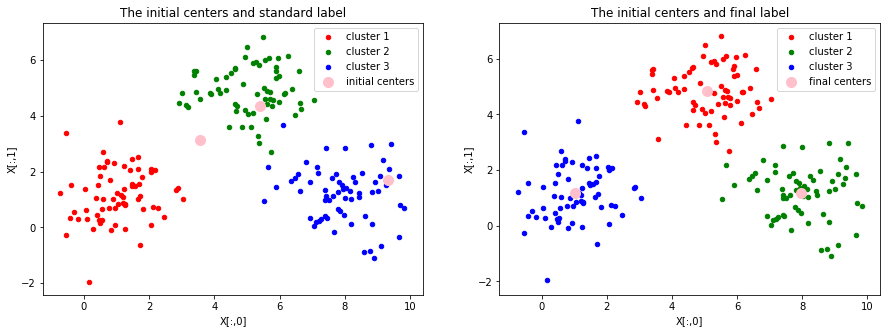

In [6]:
# Load the dataset
X,y=data,label
# Execute K-means 
y_new,initial_centroids,centroids_new = Keans(X,k=3,max_iterations=500,threshold=0.0001)

# Plot results
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(X[y==0][:, 0], X[y==0][:, 1],s=20,color="red",label="cluster 1")
plt.scatter(X[y==1][:, 0], X[y==1][:, 1],s=20,color="green",label="cluster 2")
plt.scatter(X[y==2][:, 0], X[y==2][:, 1],s=20,color="blue",label="cluster 3")
plt.scatter(initial_centroids[:,0],initial_centroids[:,1],s=100,color="pink",label='initial centers')
plt.legend(loc='upper right')
plt.xlabel('X[:,0]')
plt.ylabel('X[:,1]')
plt.title('The initial centers and standard label')

plt.subplot(1,2,2)
plt.scatter(X[y_new==0][:, 0], X[y_new==0][:, 1],s=20,color="red",label="cluster 1")
plt.scatter(X[y_new==1][:, 0], X[y_new==1][:, 1],s=20,color="green",label="cluster 2")
plt.scatter(X[y_new==2][:, 0], X[y_new==2][:, 1],s=20,color="blue",label="cluster 3")
plt.scatter(centroids_new[:,0],centroids_new[:,1],s=100,color="pink",label='final centers')
plt.legend(loc='upper right')
plt.xlabel('X[:,0]')
plt.ylabel('X[:,1]')
plt.title('The initial centers and final label')
plt.show()






#### Question 5: Demonstrate performance of method in a quantitative manner

We can compare the difference between the standard label and the generated label, if there is no difference, it means K-means has great performance. we can use the sum of absolute value of the difference to evaluate the performance.

In [7]:
# If all the elements in delta is 0, it means this algorithm has great performance
def Kmeans_performances(y_standard,y_generate):
    return np.sum(np.abs(y_standard-y_generate))
Value=Kmeans_performances(y,y_new)

print("The value to evaluate the performance is:",Value)

The value to evaluate the performance is: 268.0


# <span style="color:#00B8DE"> 2. Image segmentation</span> 

#### Question 6: Use io.imread function from skimage to read satellite image, called TF0v7 (from SAT data)  then show this image

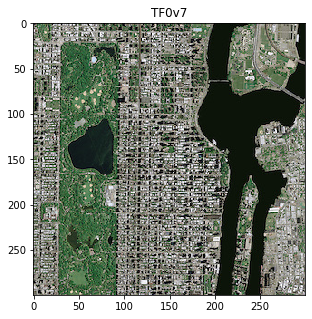

In [8]:
import skimage
from skimage import data
from skimage import io
import PIL.Image as image

# read image and display it 
satellite_image= io.imread("TFOv7.png")
row, col, _=satellite_image.shape
# generate data for K-means
pic=np.mat(satellite_image.reshape(-1,1,3))
plt.title('TF0v7')
plt.imshow(satellite_image)

# read label
file = open("TFOv7_labels.txt","r")
satellite_image_label=np.zeros([300,300])
i=0
for line in file:
    fields= (((line.split("\n"))[0]).split(","))
    satellite_image_label[i,:]=fields
    i=1+i

#### Question 7: Use Kmeans algorithm to segment this image and show the result. Note that it contains three classes = 'building', 'vegetation', and  'water'
 

In [9]:
# Load data 
X,y=pic,satellite_image_label

# Execute K-means Algorithm
y_new,initial_centroids,centroids_new = Keans(X,k=3,max_iterations=100,threshold=0.0001)

Text(0.5, 1.0, 'building in TF0v7 ')

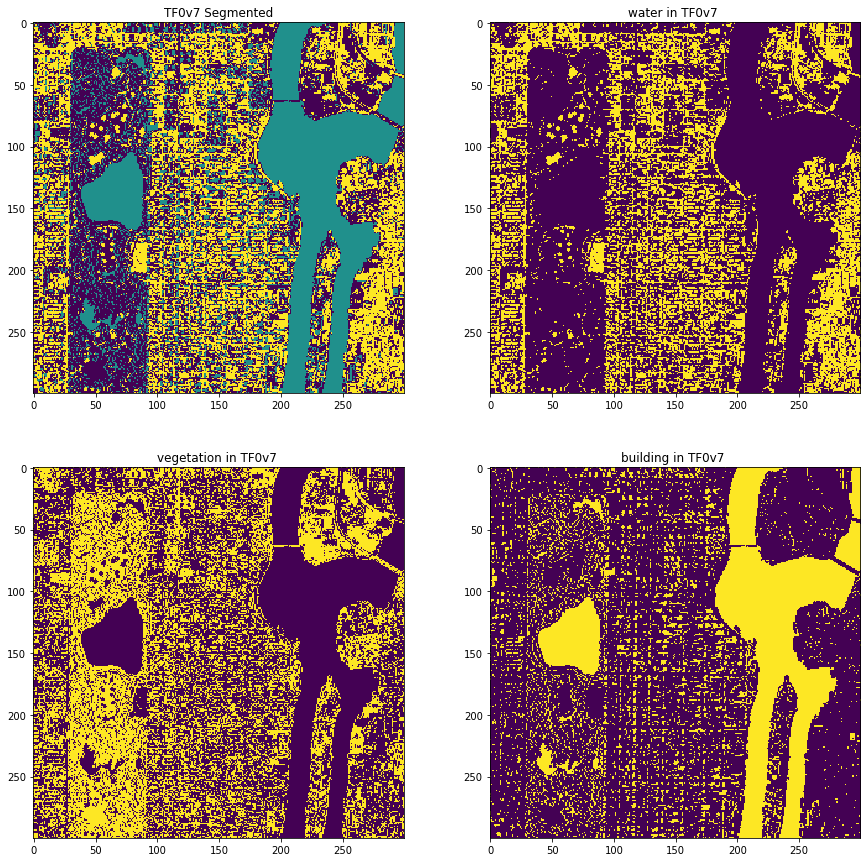

In [10]:
# Display the results
figure_new_Q7 = y_new.reshape([row, col])

# Display the segmented image
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(figure_new_Q7)
plt.title('TF0v7 Segmented')

# Display building element
plt.subplot(2,2,2)
plt.imshow(figure_new_Q7==2,label="water")
plt.title('water in TF0v7 ')

# Display vegetation element
plt.subplot(2,2,3)
plt.imshow(figure_new_Q7==0,label="vegetation")
plt.title('vegetation in TF0v7 ')

# Display water element
plt.subplot(2,2,4)
plt.imshow(figure_new_Q7==1,label="building")
plt.title('building in TF0v7 ')


#### Question 8: Use PCA method to reduce the image in two dimensions and show the result. (Use the svd function from numpy.linalg)

In [11]:
Xmax=satellite_image.shape[0]
Ymax=satellite_image.shape[1]

In [12]:
#image=satellite_image.reshape((Xmax*Ymax,3))
image=pic
u,s,v=np.linalg.svd(image,False)
s=np.eye(3)
k=np.dot(u[:,:2],s[:2,:2])

#### Question 9: Use Kmeans algorithm to segment this new image and compare with the results obtained when apply the method on the original image

In [13]:
# Load data 
X_Q9,y_Q9=k,satellite_image_label

# Execute K-means Algorithm
y_new_Q9,initial_centroids_Q9,centroids_new_Q9 = Keans(X_Q9,k=3,max_iterations=400,threshold=0.0001)

Text(0.5, 1.0, 'water in TF0v7 ')

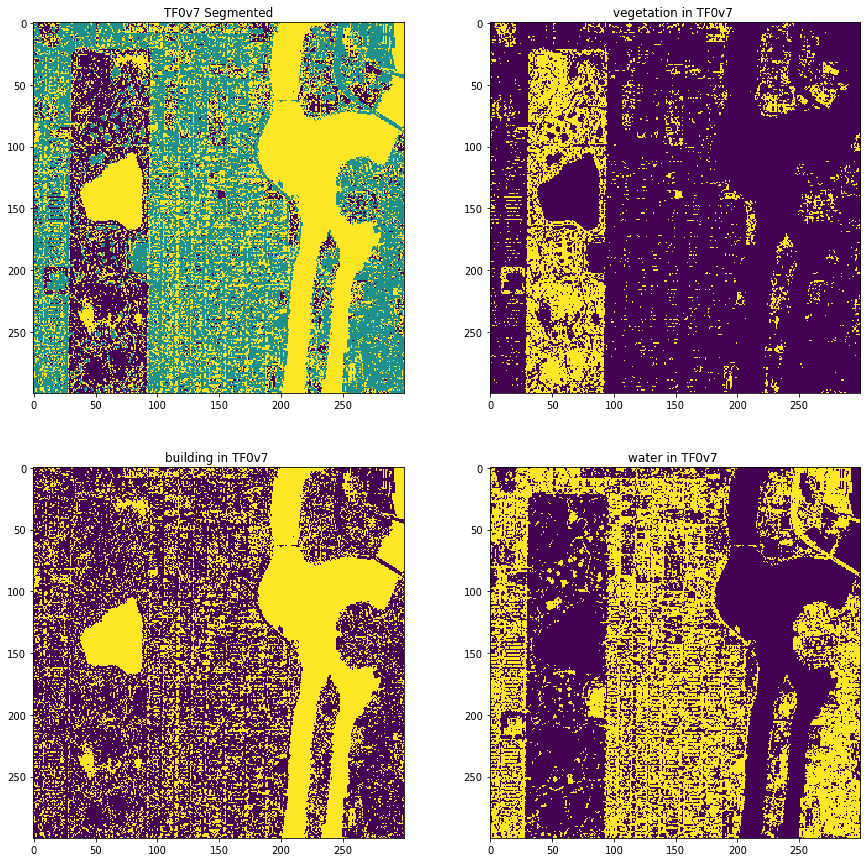

In [14]:
# Display the results
figure_new_Q9 = y_new_Q9.reshape([row, col])

# Display the segmented image
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(figure_new_Q9)
plt.title('TF0v7 Segmented')

# Display building element
plt.subplot(2,2,2)
plt.imshow(figure_new_Q9==0,label="vegetation")
plt.title('vegetation in TF0v7 ')

# Display vegetation element
plt.subplot(2,2,3)
plt.imshow(figure_new_Q9==2,label="building")
plt.title('building in TF0v7 ')

# Display water element
plt.subplot(2,2,4)
plt.imshow(figure_new_Q9==1,label="water")
plt.title('water in TF0v7 ')


Text(0.5, 1.0, 'TF0v7 Segmented K means with PCA \n- building segmentation')

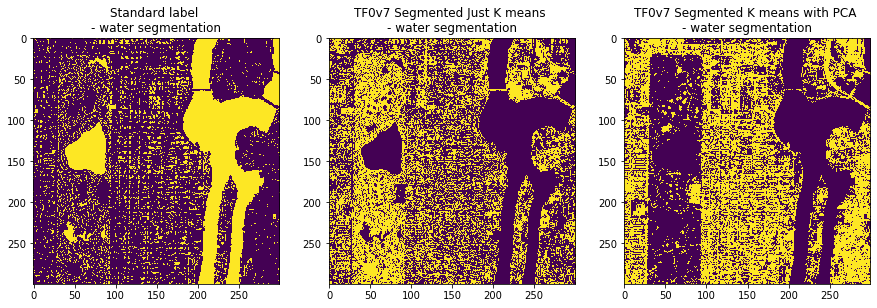

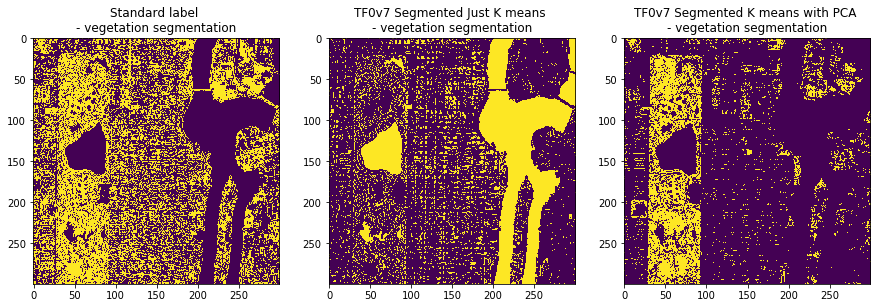

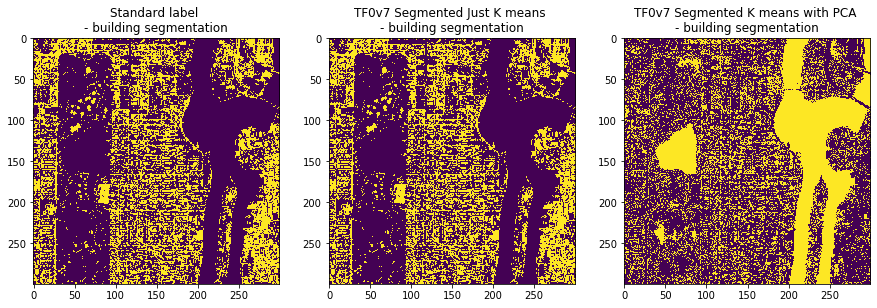

In [15]:
# Comparer the results from Question 7 and Question 9
# Comparaison of water segmentation
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(satellite_image_label==2) 
plt.title('Standard label \n- water segmentation')

plt.subplot(1,3,2)
plt.imshow(figure_new_Q7==0)
plt.title('TF0v7 Segmented Just K means \n- water segmentation')

plt.subplot(1,3,3)
plt.imshow(figure_new_Q9==1)
plt.title('TF0v7 Segmented K means with PCA \n- water segmentation')

# Comparaison of vegetation segmentation
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(satellite_image_label==1) 
plt.title('Standard label \n- vegetation segmentation')

plt.subplot(1,3,2)
plt.imshow(figure_new_Q7==1)
plt.title('TF0v7 Segmented Just K means \n- vegetation segmentation')

plt.subplot(1,3,3)
plt.imshow(figure_new_Q9==0)
plt.title('TF0v7 Segmented K means with PCA \n- vegetation segmentation')

# Comparaison of building segmentation
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(satellite_image_label==0) 
plt.title('Standard label \n- building segmentation')

plt.subplot(1,3,2)
plt.imshow(figure_new_Q7==2)
plt.title('TF0v7 Segmented Just K means \n- building segmentation')

plt.subplot(1,3,3)
plt.imshow(figure_new_Q9==2)
plt.title('TF0v7 Segmented K means with PCA \n- building segmentation')

As you can see in the former picture, the result processed by PCA it is not as goog as the result gotten directly from K-means (some pixels belonged of "vegetation" are classified in "water"). The reduction in quality of classification maybe come from the reduction of dimensions by using PCA.

#### Question 10: Use SVM algorithm to segment this image and compare with the result obtained by Kmeans 

In [16]:
from skimage import io
import numpy as np
image_svm= io.imread('TFOv7.png')
print(np.shape(image_svm))

(300, 300, 3)


In [17]:
# prediction function  
# According to the traning data, the support vector and theirs labels, update the labels
def predict_kernel(lambd, X_sv, y_sv, b, X_test,ker,p1,p2,gamma,beta,p,sigma):
    K=kernels_func(X_test,X_sv,ker,p1,p2,gamma,beta,p,sigma)
    #print("K",K.shape,"np.multiply(lambd,y_sv)",np.shape(np.multiply(lambd,y_sv)))
    pk=np.dot(K,np.multiply(lambd,y_sv))+b
    return np.sign(pk) 

# define SVM function
def SVM_kernel(X, y,ker,p1,p2,gamma,beta,p,sigma):
    """
    Programe algorithm SVM_kernel where
    input: X in R^{M x N} training dataset
           y in R^N labels
           param: parameters of the kernels
           ker: type of kernel

    output: lambd in \R^M the dual optimal 
           b in R
           (X_sv, y_sv) set of data and its labels which correspond to the lambd >0 
    """

    K=kernels_func(X,X,ker,p1,p2,gamma,beta,p,sigma)
    K=matrix(K)
    N,M=np.shape(K)
    y=matrix(y)
    P_par=matrix((K*np.dot(y,y.T)))
    q_par=matrix(-np.ones([np.shape(y)[0],1]))
    G_par=matrix(-np.identity(N))
    h_par=matrix(np.zeros([np.shape(y)[0],1]))
    A_par=matrix(y.T)
    b_par=matrix(0.0)
    cvxopt.solvers.options['show_progress']=False
    lambd=matrix(cvxopt.solvers.qp(P_par,q_par,G_par,h_par,A_par,b_par)['x'])
    
    
    # After the calculation, b is a matrice in R^N
    # But for the hyperplane, we just need to use the mean value of b
    b = y-np.dot(K,np.multiply(lambd,y))
    
    # To ensure all the lambd > 0
    index=np.argwhere((np.array(lambd))>1e-5)[:,0]
    lambd=np.array(lambd)
    lambd=np.array(lambd)[index]
    
    
    # Take out non-zero values for support vector X and theirs labels
    #print('b',b)
    X_sv = np.array(X)[index]
    y_sv = np.array(y)[index]
    b = np.array(b)[index]
    
    K1=kernels_func(X_sv,X_sv,ker,p1,p2,gamma,beta,p,sigma)
    b2 = y_sv-np.dot(K1,np.multiply(lambd,y_sv))
    b=np.mean(np.array(b))
    return b, lambd, X_sv, y_sv

# define the kernels
def kernels_func (x,y,ker,p1,p2,gamma,beta,p,sigma):
    if ker == 'linear':
        return np.dot(x,y.T) 
    elif ker == 'poly':
        # beta should be positive to avoid error when solving the quadratic optimization problem
        if beta < 0:
            beta = -beta
        return  (gamma*np.dot(x,y.T) + beta)**p
    elif ker == 'gauss':
        # For Gaussian Kernel, take care that the relationship between the two matrices is not dot production
        K = matrix(np.zeros((x.shape[0],y.shape[0])))
        for i in range (x.shape [0]):
            for j in range (y.shape [0]) :
                K[i,j]=np.exp (-np.linalg.norm((np.matrix(x[i,:])-np.matrix(y[j,:])))**2/2/sigma)
        return  K
    elif ker == 'tanh':
        if beta > 0:
            beta = -beta
        return np.tanh(gamma*np.dot(x,y.T) + beta)
        

Text(0.5, 1.0, 'Classified in the Region of Interest')

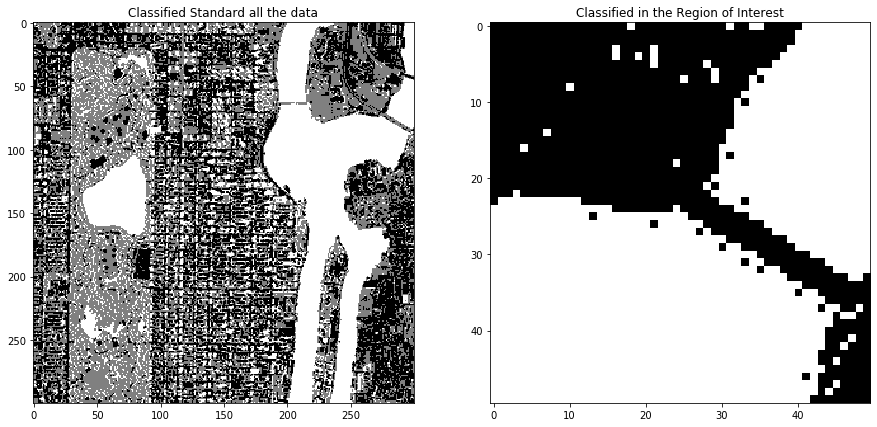

In [18]:
#satellite_image= io.imread("TFOv7.png")
RGB_resha=image_svm.reshape(-1,1,3)

# Initialize the parameters of SVM, and chose kernel tanh
p1 = 1
p2 = 0
gamma = 1
beta = 5
p = 2
sigma = 2
ker = 'tanh'

# Select the region of interest
data1_svm = image_svm[50:100,250:300,0]
data2_svm = image_svm[50:100,250:300,1]
data3_svm = image_svm[50:100,250:300,2]

# From Region of Interest, generate label according to the intensity of every pixel
data_label_svm = np.zeros ((data1_svm.shape[0],data1_svm.shape[1]))
data_label_svm [data1_svm < 25] = 1.
data_label_svm [data1_svm >= 25] = -1

# Data processing 
X1 = data1_svm.reshape (-1,1)
X2 = data2_svm.reshape (-1,1)
X3 = data3_svm.reshape (-1,1)
X_train = np.column_stack([X1,X2,X3])
y_train = data_label_svm.reshape (-1,1)

X_train=X_train/256
# Display the raw image and the classified image of Region of Interest
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(satellite_image_label,cmap='gray') 
plt.title ('Classified Standard all the data')
plt.subplot(1,2,2)
plt.imshow(data_label_svm,cmap='gray') 
plt.title ('Classified in the Region of Interest')

In [19]:
# Find the hyperplane's parameters, the support vector and theirs labels
b, lambd, X_sv, y_sv = SVM_kernel(X_train, y_train,ker,p1,p2,gamma,beta,p,sigma) 

Text(0.5, 1.0, 'segmentation with svm (water)')

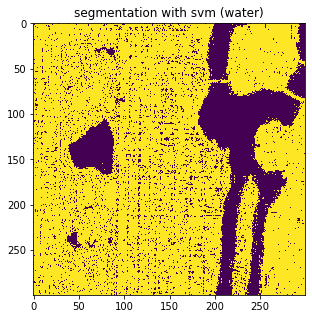

In [20]:
X_data = RGB_resha
# According to the traning data, the support vector and theirs labels, update the labels
seg = predict_kernel(lambd, X_sv, y_sv, b, X_data,ker,p1,p2,gamma,beta,p,sigma)
# Display results
seg = seg.reshape (300,300)
plt.imshow(seg)
plt.title('segmentation with svm (water)')

Text(0.5, 1.0, 'Classified in Region of Interest Modified')

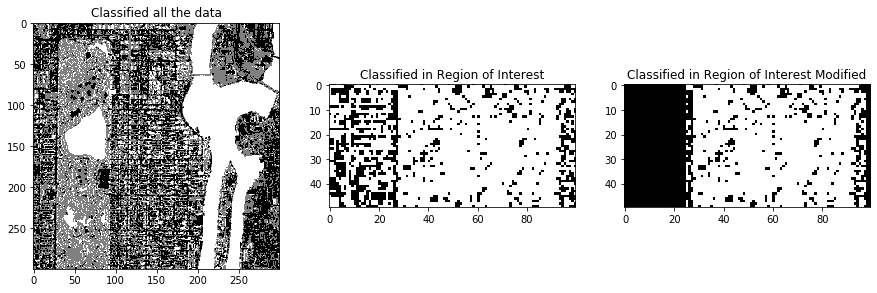

In [32]:
# Select other region of interest

data1_svm_2 = image_svm[250:300,0:100,0]
data2_svm_2 = image_svm[250:300,0:100,1]
data3_svm_2 = image_svm[250:300,0:100,2]


#data1_svm_2 = image_svm[250:300,65:115,0]
#data2_svm_2 = image_svm[250:300,65:115,1]
#data3_svm_2 = image_svm[250:300,65:115,2]


# From Region of Interest, generate label according to the intensity of every pixel
data_label_svm_2 = np.zeros ((data2_svm_2.shape[0],data2_svm_2.shape[1]))
data_label_svm_2 [data2_svm_2 < 140] = 1
data_label_svm_2 [data2_svm_2 >=140] = -1


# Data processing 
X1_2 = data1_svm_2.reshape (-1,1)
X2_2 = data2_svm_2.reshape (-1,1)
X3_2 = data3_svm_2.reshape (-1,1)
X_train_2 = np.column_stack([X1_2,X2_2,X3_2])


#print(X_train_2)
X_train_2=X_train_2/256
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(satellite_image_label,cmap='gray') 
plt.title ('Classified all the data')
plt.subplot(1,3,2)
plt.imshow(data_label_svm_2,cmap='gray') 
plt.title ('Classified in Region of Interest')

data_label_svm_2 [0:50,0:25] = -1 # we manually label the mixed part with only 1 label to reduce the ambiguity for SVM
data_label_svm_2 [0:50,98:100] = -1                                   # calculation.
y_train_2 = data_label_svm_2.reshape (-1,1)
plt.subplot(1,3,3)
plt.imshow(data_label_svm_2,cmap='gray') 
plt.title ('Classified in Region of Interest Modified')



In [33]:
# Find the hyperplane's parameters, the support vector and theirs labels
gamma = 1
beta = 3
p = 2
sigma = 2
ker = 'poly'
b_2, lambd_2, X_sv_2, y_sv_2 = SVM_kernel(X_train_2, y_train_2,ker,p1,p2,gamma,beta,p,sigma) # to fill 

Text(0.5, 1.0, 'segmentation 3 classes with Kmeans')

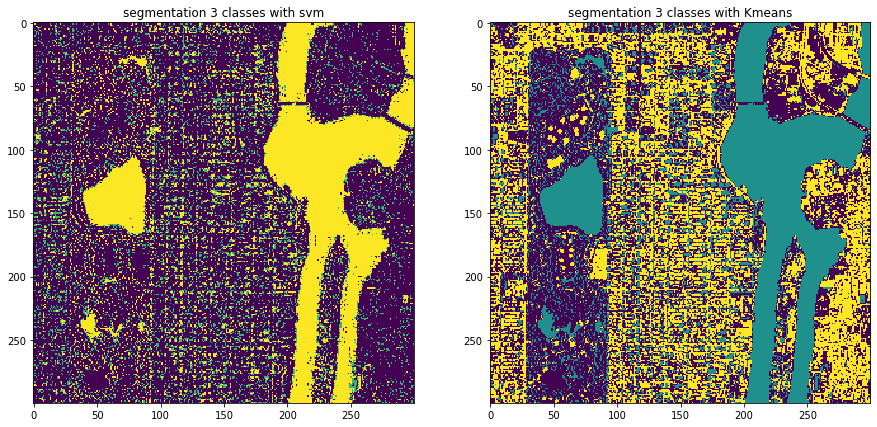

In [34]:
data1_2 = image_svm[:,:,0]
data2_2 = image_svm[:,:,1]
data3_2 = image_svm[:,:,2]
data1_2[seg == 1] == 0
data2_2[seg == 1] == 0
data2_2[seg == 1] == 0
X1_data_2 = data1_2.reshape (-1,1)
X2_data_2 = data2_2.reshape (-1,1)
X3_data_2 = data3_2.reshape (-1,1)
X_data_2 = np.column_stack([X1_data_2,X2_data_2,X3_data_2])
X_data_2 = RGB_resha
# According to the traning data, the support vector and theirs labels, update the labels
seg_2 = predict_kernel(lambd_2, X_sv_2, y_sv_2, b_2, X_data_2,ker,p1,p2,gamma,beta,p,sigma)
# Display results
seg_2 = seg_2.reshape (300,300)
seg_2[seg == -1] = 2
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(seg_2)
plt.title('segmentation 3 classes with svm')
plt.subplot(1,2,2)
plt.imshow(figure_new_Q7)
plt.title('segmentation 3 classes with Kmeans')


We can see that the results of SVM is not as good as the Kmeans. The reason is that in the second segmentation (buildings and vegetation), when we choose a threshold to set the labels for the training set, the labels are mixed (or not be well grouped) and create the ambiguity for SVM algorithm, thus it is hard to calculate the parameters necessary for SVM prediction. To solve this problem, first we chose a region of interest. In the part that 2 labels are mixed, we manually labeled that part with only 1 label which appeared more regularly in that part. Thus the ambiguity is reduced and the SVM can do a classification.